In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print('pandas versio: ' + pd.__version__)

pandas versio: 1.3.5


In [8]:
%pwd

'C:\\Users\\luis-\\Documents\\Data Practic\\Sales analisis'

In [12]:
%cd C:\\Users\\luis-\\Documents\\Data Practic\\Sales analisis\\


C:\Users\luis-\Documents\Data Practic\Sales analisis


In [13]:
%ls

 El volumen de la unidad C es Windows
 El número de serie del volumen es: 9C86-EF7F

 Directorio de C:\Users\luis-\Documents\Data Practic\Sales analisis

31/01/2022  10:29 p. m.    <DIR>          .
31/01/2022  10:29 p. m.    <DIR>          ..
30/01/2022  06:40 a. m.    <DIR>          .ipynb_checkpoints
31/01/2022  10:10 p. m.        17,403,583 all_data_sales_2019
31/01/2022  10:16 p. m.        16,415,525 all_data_sales_2019.csv
05/09/2020  11:39 a. m.    <DIR>          Sales_Data
31/01/2022  10:29 p. m.             9,506 Untitled.ipynb
               3 archivos     33,828,614 bytes
               4 dirs  616,450,494,464 bytes libres


In [32]:
'''os.listdir(path='.'):
Return a list containing the names of the entries in the directory given by path. 
The list is in arbitrary order, and does not include the special entries and even if they are present in the directory. 
'''

path = 'C:\\Users\\luis-\\Documents\\Data Practic\\Sales analisis\\Sales_Data'
files = os.listdir(path) 

#create a empty dataframe
all_data = pd.DataFrame()



for file in files:
    df = pd.read_csv('C:\\Users\\luis-\\Documents\\Data Practic\\Sales analisis\\Sales_Data\\' + file)
    all_data = pd.concat([all_data, df])
    
#save as csv file
all_data.to_csv('all_data_sales_2019.csv', index= False)


In [14]:
sales_2019 = pd.read_csv('all_data_sales_2019.csv')
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [40]:
sales_2019.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [118]:
'''we need convert the column 'Date Order' in datetime type
and 'Price Eacch in '

'''

#convert the colum Order Date in date time type
sales_2019['Order Date']= pd.to_datetime(sales_2019['Order Date'], errors= 'coerce')
sales_2019['Price Each']= pd.to_numeric(sales_2019['Price Each'])
sales_2019['Quantity Ordered']= pd.to_numeric(sales_2019['Quantity Ordered'])
sales_2019['Purchase Address']= sales_2019['Purchase Address'].astype('string')

#drop the rows with na dates
sales_2019.dropna(inplace=True)

In [137]:
sales_2019.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            string
month                        int64
city                        object
states                      object
dtype: object

In [66]:
sales_2019['month'] = sales_2019['Order Date'].dt.month
sales_2019['month']

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: month, Length: 185950, dtype: int64

In [67]:
sales_2019.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
59437,154243,Flatscreen TV,1,300.00,2019-02-20 12:24:00,"75 2nd St, Boston, MA 02215",2
17859,193598,USB-C Charging Cable,1,11.95,2019-04-10 23:35:00,"177 Madison St, Austin, TX 73301",4
22074,240216,27in FHD Monitor,1,149.99,2019-08-15 07:55:00,"818 7th St, San Francisco, CA 94016",8
29827,247616,Wired Headphones,1,11.99,2019-08-11 14:55:00,"901 Meadow St, Dallas, TX 75001",8
126241,199555,Lightning Charging Cable,1,14.95,2019-05-30 10:50:00,"530 Johnson St, Boston, MA 02215",5
166705,270732,Apple Airpods Headphones,1,150.00,2019-10-24 16:15:00,"248 Jackson St, San Francisco, CA 94016",10
76432,149703,AAA Batteries (4-pack),1,2.99,2019-01-31 14:25:00,"755 14th St, Boston, MA 02215",1
40863,305652,Apple Airpods Headphones,1,150.00,2019-12-04 11:43:00,"960 Wilson St, Los Angeles, CA 90001",12
170076,273953,USB-C Charging Cable,1,11.95,2019-10-20 21:25:00,"999 8th St, Atlanta, GA 30301",10
42721,307428,Flatscreen TV,1,300.00,2019-12-23 02:28:00,"289 Cherry St, Dallas, TX 75001",12


## What was the best  month sor sales??


In [79]:
sales_2019.groupby(['month'])[['Price Each']].sum().sort_values(by =['Price Each'],ascending=False)

,Price Each
month,
12,4588415.41
10,3715554.83
4,3367671.02
11,3180600.68
5,3135125.13
3,2791207.83
7,2632539.56
6,2562025.61
8,2230345.42


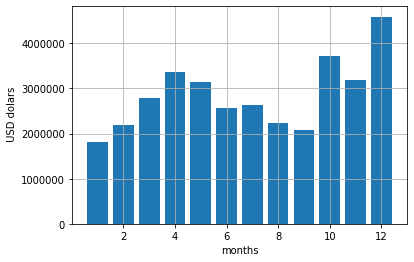

In [111]:
result = sales_2019.groupby(['month'])[['Price Each']].sum()
months = range(1,13)

plt.bar(months, result['Price Each'] )
plt.grid(visible=True)
plt.xlabel('months')
plt.ylabel(' USD dolars')

plt.show()


## add the city an states colum

In [142]:
sales_2019['city'] = sales_2019['Purchase Address'].apply(lambda x: x.split(',')[1])
sales_2019['states'] = sales_2019['Purchase Address'].apply(lambda x: x.split(',')[2][:3])
sales_2019['sales in USD$'] = sales_2019['Quantity Ordered']*sales_2019['Price Each']

sales_2019[['city', 'states']]

,city,states
0,Dallas,TX
2,Boston,MA
3,Los Angeles,CA
4,Los Angeles,CA
5,Los Angeles,CA
...,...,...
186845,Los Angeles,CA
186846,San Francisco,CA
186847,San Francisco,CA
186848,San Francisco,CA


In [145]:
sales_2019.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,states,sales in USD$
170903,274731,AAA Batteries (4-pack),1,2.99,2019-10-25 10:18:00,"790 Lincoln St, Los Angeles, CA 90001",10,Los Angeles,CA,2.99
6404,182680,Apple Airpods Headphones,1,150.00,2019-04-07 13:35:00,"560 10th St, Austin, TX 73301",4,Austin,TX,150.00
141386,282873,Lightning Charging Cable,1,14.95,2019-11-10 09:09:00,"930 1st St, Portland, OR 97035",11,Portland,OR,14.95
97002,215005,27in FHD Monitor,2,149.99,2019-06-19 14:48:00,"905 Main St, Dallas, TX 75001",6,Dallas,TX,299.98
63580,158197,Wired Headphones,1,11.99,2019-02-25 17:17:00,"585 10th St, San Francisco, CA 94016",2,San Francisco,CA,11.99
154052,294963,iPhone,1,700.00,2019-11-01 16:57:00,"916 Willow St, Portland, OR 97035",11,Portland,OR,700.00
128814,202005,34in Ultrawide Monitor,1,379.99,2019-05-19 23:27:00,"25 12th St, Boston, MA 02215",5,Boston,MA,379.99
41552,306308,Flatscreen TV,1,300.00,2019-12-13 18:00:00,"960 Hill St, Seattle, WA 98101",12,Seattle,WA,300.00
49245,313673,Apple Airpods Headphones,1,150.00,2019-12-28 12:24:00,"206 10th St, Dallas, TX 75001",12,Dallas,TX,150.00
95933,213998,Vareebadd Phone,1,400.00,2019-06-03 11:14:00,"950 River St, Boston, MA 02215",6,Boston,MA,400.00


## What citi hat the highest  number of sales 

In [159]:
top_10_citys = sales_2019.groupby(['city','states']).sum().sort_values(by=['sales in USD$'], ascending=False).head(10)
top_10_citys

,,Quantity Ordered,Price Each,month,sales in USD$
city,states,,,,
San Francisco,CA,50239,8211461.74,315520,8262203.91
Los Angeles,CA,33289,5421435.23,208325,5452570.80
New York City,NY,27932,4635370.83,175741,4664317.43
Boston,MA,22528,3637409.77,141112,3661642.01
Atlanta,GA,16602,2779908.20,104794,2795498.58
Dallas,TX,16730,2752627.82,104620,2767975.40
Seattle,WA,16553,2733296.01,104941,2747755.48
Portland,OR,11303,1860558.22,70621,1870732.34
Austin,TX,11153,1809873.61,69829,1819581.75


<function matplotlib.pyplot.show(*args, **kw)>

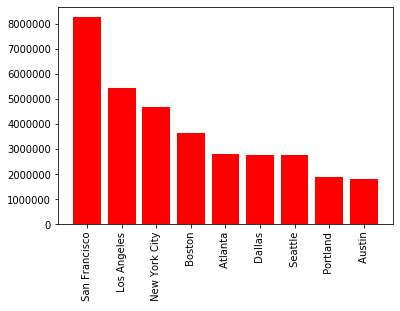

In [179]:
citys = list(top_10_citys.reset_index()['city'])  #x axis
citys_10_sales = list(top_10_citys['sales in USD$'])   #y axis
plt.xticks(rotation=90)

plt.bar(citys, citys_10_sales, color='red',)

plt.show




## what time should we display advertisements to maximize likehood of customers buyin product?

In [185]:
sales_2019['hour'] = sales_2019['Order Date'].dt.hour.astype('category')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,states,sales in USD$,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99,17


In [217]:
top_hour_sales = sales_2019.groupby(['hour']).sum()
sales_2019.groupby(['hour']).sum().sort_values(by=['sales in USD$'], ascending=False)

,Quantity Ordered,Price Each,month,sales in USD$
hour,,,,
19,14470,2398588.31,91389,2412938.54
12,14202,2299876.68,89161,2316821.34
11,14005,2288855.18,87654,2300610.24
20,13768,2268185.16,86375,2281716.24
18,13802,2207696.93,86421,2219348.30
13,13685,2139743.86,85808,2155389.80
17,12229,2116777.02,77454,2129361.61
14,12362,2072194.77,77836,2083672.73
21,12244,2030763.83,77103,2042000.86


#### the best hour for sales is  19:00

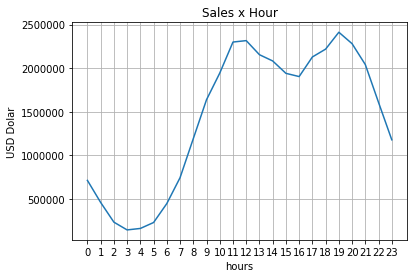

In [230]:
hour_sales = list(top_hour_sales['sales in USD$'])

fig, hs= plt.subplots()

hs.plot(range(24), hour_sales,)

hs.set(title='Sales x Hour',
       xlabel='hours',
       ylabel= 'USD Dolar')

hs.grid()
plt.xticks(range(24))
plt.show()


## what product are most often sold together

In [283]:
df1 =sales_2019[sales_2019['Order ID'].duplicated(keep=False)]
df1['Grouper'] = df1.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouper']]
df1.head()

C:\Users\luis-\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouper
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


## What product sold the most? 

In [319]:
top_products = sales_2019.groupby(['Product']).sum().sort_values(by=['Quantity Ordered'], ascending=False)
top_products.drop(columns=['Price Each', 'month','duplicate'], inplace=True)
top_products['% to sales'] = top_products['sales in USD$']*100/34492035.97

top_products

#top products 

,Quantity Ordered,sales in USD$,% to sales
Product,,,
AAA Batteries (4-pack),31017,92740.83,0.268876
AA Batteries (4-pack),27635,106118.40,0.307661
USB-C Charging Cable,23975,286501.25,0.830630
Lightning Charging Cable,23217,347094.15,1.006302
Wired Headphones,20557,246478.43,0.714595
Apple Airpods Headphones,15661,2349150.00,6.810703
Bose SoundSport Headphones,13457,1345565.43,3.901090
27in FHD Monitor,7550,1132424.50,3.283148
iPhone,6849,4794300.00,13.899730
